First, let's upload the data to the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
world_inflation = pd.read_csv('world_inflation/Data set for inflation.csv')
world_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


We can see that we do not need columns "Indicator Name" and "Indicator code". These two columns are common to all observations and we already know that the data concerns annual inflation rate (CPI).

In [3]:
world_inflation = world_inflation.drop(columns=["Indicator Name", "Indicator Code", "Country Code"])
world_inflation.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


Now, let's see what kind of data we have. It seems that we have 266 observations with 66 features of which 62 refer to years 1960-2021.

In [4]:
world_inflation.shape

(266, 63)

Finally, it would be smart to change names of two columns for easier handling. We will also set index to the column "country".


In [5]:
world_inflation = world_inflation.rename(columns={'Country Name': 'country'})
world_inflation = world_inflation.set_index("country")
world_inflation.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


However, it seems that lots of data is missing, i.e. we have limited observations of inflation in particular countries depending on year. For example, in 1960 we have just 70 non-null cells and in 2020 we have 213 non-null cells.

In [6]:
world_inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    70 non-null     float64
 1   1961    72 non-null     float64
 2   1962    74 non-null     float64
 3   1963    75 non-null     float64
 4   1964    79 non-null     float64
 5   1965    86 non-null     float64
 6   1966    93 non-null     float64
 7   1967    100 non-null    float64
 8   1968    101 non-null    float64
 9   1969    102 non-null    float64
 10  1970    107 non-null    float64
 11  1971    111 non-null    float64
 12  1972    114 non-null    float64
 13  1973    117 non-null    float64
 14  1974    120 non-null    float64
 15  1975    124 non-null    float64
 16  1976    125 non-null    float64
 17  1977    129 non-null    float64
 18  1978    129 non-null    float64
 19  1979    124 non-null    float64
 20  1980    131 non-null    float64
 21  1981    146 non-null    float64
 22

We can see that the number of observations increased in time, but this still leaves us with the problem of missing values. Basically, you can do three things with missing values: keep the missing data, drop the missing data or fill the missing data. In our case the best strategy is to keep the missing data, as we would be left with very limited data if we dropped columns or rows with missing data and it would make no sense to fill values for inflation, which is a distinct and sometimes volatile variable. However, we need to keep in mind that lots of data is missing.

To finish up this introductory part, we can have a look at basic statistical summary for our data.

In [7]:
world_inflation.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,70.000000,72.000000,74.000000,75.000000,79.000000,86.000000,93.000000,100.000000,101.000000,102.000000,...,237.000000,235.000000,233.000000,232.000000,232.000000,227.000000,224.000000,222.000000,213.000000,192.000000
mean,3.554980,3.491289,4.630783,5.768657,6.263870,8.192841,17.765764,5.469524,6.309716,4.446334,...,5.499223,4.031436,3.612610,3.516273,5.891873,4.594103,3.971099,4.589566,6.696483,7.829945
std,6.795697,4.508248,15.209955,17.049591,13.749261,33.376181,117.536433,14.150802,18.309690,4.140570,...,6.521095,5.051750,5.600188,9.659254,30.205721,13.055816,7.484516,18.529245,39.906358,30.515852
min,-5.030042,-3.900000,-3.846154,-2.694655,-4.535654,-3.878976,-1.361868,-8.422486,-10.033895,-4.339051,...,-3.045863,-4.294873,-1.509245,-3.749145,-3.078218,-1.537100,-2.814698,-3.233389,-2.595243,-0.772844
25%,0.871370,1.468978,1.147323,1.695327,1.870349,1.940405,2.479008,1.564937,1.588785,2.347005,...,2.577182,1.461883,0.906798,0.305200,0.388838,1.429107,1.659275,1.114597,0.574163,2.333678
50%,1.945749,2.102977,2.669962,2.876322,3.328408,3.410026,3.815659,3.020244,3.161937,3.388412,...,3.852160,2.767897,2.559749,1.548692,1.652140,2.380236,2.527344,2.216776,2.002412,3.789169
75%,4.037155,3.601606,4.614353,4.997767,4.822426,4.938170,6.951872,4.500319,4.697428,5.811237,...,6.314745,5.273786,4.625551,4.031250,4.171390,4.436118,3.961816,3.101341,3.681813,5.329709
max,39.590444,22.747264,131.397850,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,21.763295,...,59.219736,40.639428,62.168650,121.738085,379.999586,187.851630,83.501529,255.304991,557.201817,382.815998


Now, you might have noticed that the dataframe consist not only of data for countries, but also for geographical regions or groups of countries. Let's get rid of the data we do not need and divide the data into more consistent tables. We will create two dataframes: one with countries only and one with geographical locations (sections of continents).

In [8]:
geographical_locations = ["Africa Eastern and Southern",
                          "Africa Western and Central",
                          "Central Europe and the Baltics",
                          "East Asia & Pacific",
                          "Europe & Central Asia",
                          "Latin America & Caribbean",
                          "Middle East & North Africa",
                          "North America",
                          "Pacific island small states",
                          "Sub-Saharan Africa",
                          "World"
                          ]

redundant = ["Arab World", "Caribbean small states", "Early-demographic dividend", "Euro area", "European Union",
             "Fragile and conflict affected situations", "Micronesia, Fed. Sts.", "High income",
             "Heavily indebted poor countries (HIPC)", "IBRD only", "IDA & IBRD total", "IDA total", "IDA blend",
             "IDA only", "Not classified", "Low income", "Least developed countries: UN classification",
             "Lower middle income", "Low & middle income", "Late-demographic dividend", "Middle income",
             "OECD members", "Other small states", "Pre-demographic dividend", "Post-demographic dividend",
             "Small states", "East Asia & Pacific (IDA & IBRD countries)",
             "Europe & Central Asia (IDA & IBRD countries)",
             "Latin America & the Caribbean (IDA & IBRD countries)",
             "Middle East & North Africa (IDA & IBRD countries)", "South Asia (IDA & IBRD)",
             "Sub-Saharan Africa (IDA & IBRD countries)", "Upper middle income",
             "East Asia & Pacific (excluding high income)",
             "Europe & Central Asia (excluding high income)",
             "Latin America & Caribbean (excluding high income)",
             "Middle East & North Africa (excluding high income)",
             "Sub-Saharan Africa (excluding high income)",
             ]

In [9]:
countries_inflation = world_inflation.drop(axis=0, index=redundant)
countries_inflation = countries_inflation.drop(axis=0, index=geographical_locations)
countries_inflation.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091,1.620887,2.041472
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
continents_inflation = world_inflation.loc[world_inflation.index.isin(geographical_locations)]
continents_inflation.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.334923,1.438298,0.053821,-0.464499,-0.055000,2.075936,2.534454,2.664561,1.672441,3.839845
East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.974608,2.582688,2.510876,0.795280,1.276991,1.800342,2.312603,1.627244,0.846906,2.410193
Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770890,1.733620,0.592256,0.338706,0.336676,1.875101,2.013220,1.763736,1.199984,3.146288


Now that we have our two dataframes let's choose one country (Poland) as an example. We will also drop empty values for years 1960-1970.


In [11]:
poland = countries_inflation.loc["Poland"]
poland = poland.dropna()
poland.head()

1971    1.100000
1972   -0.098912
1973    2.475248
1974    7.053140
1975    2.256318
Name: Poland, dtype: float64

Let's visualize Polish inflation between 1971-2021.

Text(0.5, 1.0, 'Consumer inflation in Poland (%)')

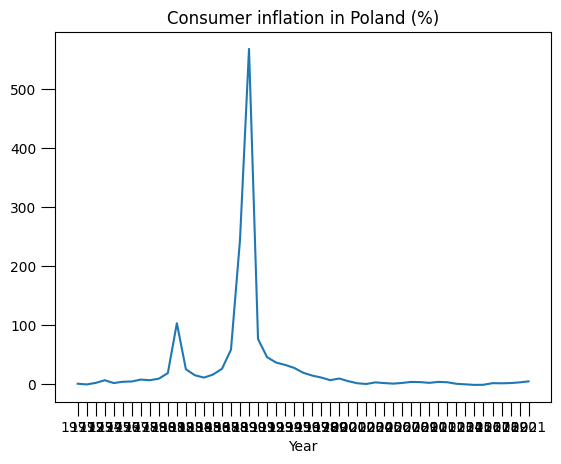

In [48]:
plt.plot(poland)
plt.xlabel('Year')
plt.title('Consumer inflation in Poland (%)')